In [1]:
import pandas as pd
from sqlalchemy import create_engine

# Database credentials
db_user = 'root'
db_password = 'Harshini%402004'
db_host = 'localhost'     # e.g., 'localhost'
db_port = '3306'          # default MySQL port
db_name = 'greeniot'

# Create a connection engine
engine = create_engine(f"mysql+pymysql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}")

# Fetch table names (schema)
table_names = pd.read_sql("SHOW TABLES;", engine)
print("Tables in the database:", table_names)

# Fetch data from your sales table
df = pd.read_sql("SELECT * FROM demo_sensordata;", engine)
print(df.head())


Tables in the database:                Tables_in_greeniot
0                      auth_group
1          auth_group_permissions
2                 auth_permission
3                    demo_contact
4                       demo_crop
5                     demo_device
6                    demo_disease
7      demo_fertilizerrequirement
8                 demo_ledcontrol
9                    demo_newuser
10            demo_newuser_groups
11  demo_newuser_user_permissions
12              demo_notification
13          demo_passwordresetotp
14                      demo_pest
15                      demo_plot
16                demo_sensordata
17               django_admin_log
18            django_content_type
19              django_migrations
20                 django_session
   id  sensor_id device_name                  timestamp  temperature  \
0   1          1     ASD2025 2025-05-14 08:48:42.998484        30.88   
1   2          1     ASD2025 2025-05-14 08:48:45.063163        30.94   
2   3       

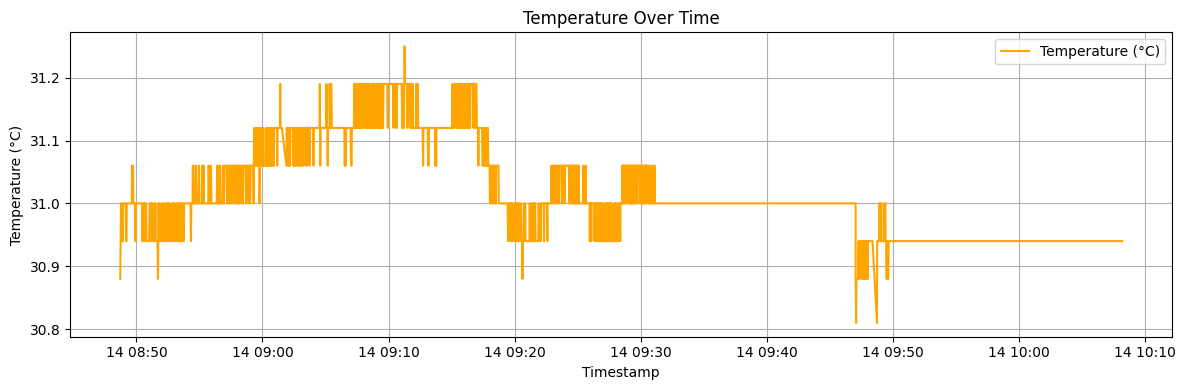

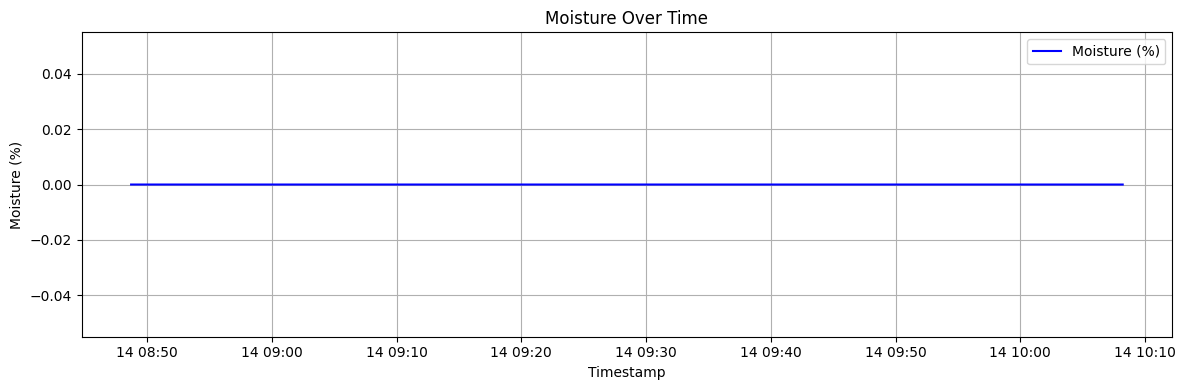

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Step 2: Sort by time (optional but good for plotting)
# df = df.sort_values('timestamp')

# Step 3: Plot Temperature vs Time
plt.figure(figsize=(12, 4))
plt.plot(df['timestamp'], df['temperature'], label='Temperature (°C)', color='orange')
plt.xlabel('Timestamp')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Over Time')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Step 4: Plot Moisture vs Time
plt.figure(figsize=(12, 4))
plt.plot(df['timestamp'], df['moisture'], label='Moisture (%)', color='blue')
plt.xlabel('Timestamp')
plt.ylabel('Moisture (%)')
plt.title('Moisture Over Time')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\HARSHINI\AppData\Local\Temp\ipykernel_9584\4068215082.py:15: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  temp_series = sensor_df['temperature'].resample('H').mean().interpolate()
C:\Users\HARSHINI\AppData\Local\Temp\ipykernel_9584\4068215082.py:16: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  moisture_series = sensor_df['moisture'].resample('H').mean().interpolate()
d:\haegl\GreenIOT_Project\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


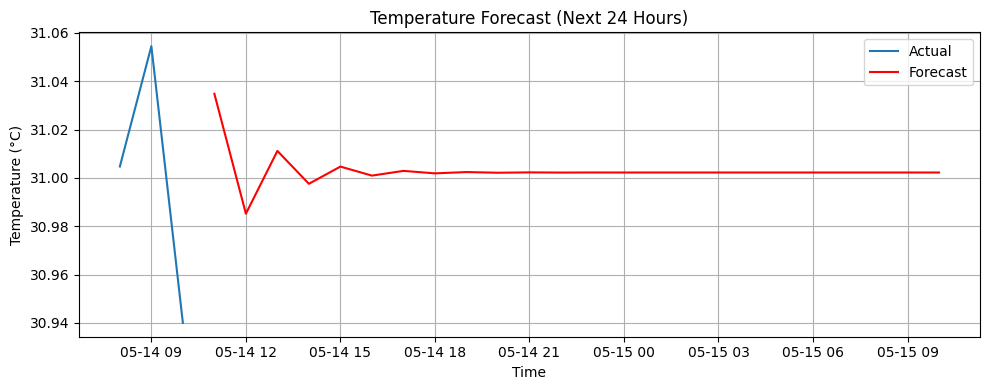

d:\haegl\GreenIOT_Project\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
d:\haegl\GreenIOT_Project\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


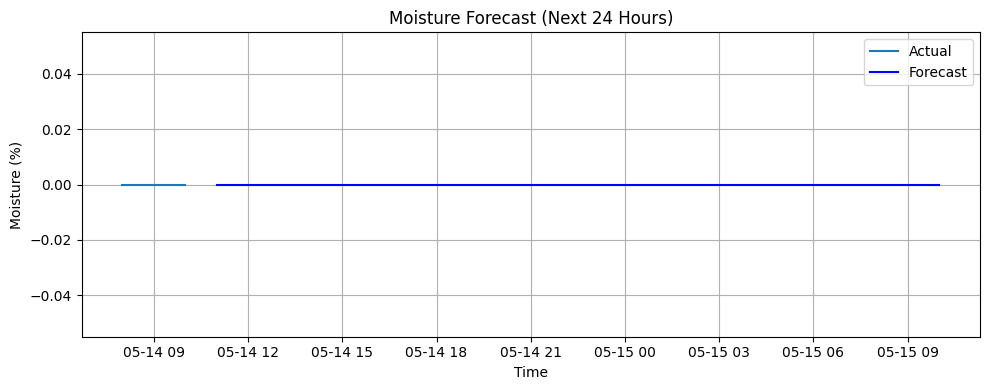

In [3]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Make a copy of the data
df_copy = df.copy()
df_copy['timestamp'] = pd.to_datetime(df_copy['timestamp'])
df_copy.set_index('timestamp', inplace=True)
df_copy = df_copy.sort_index()

# Optional: Focus on one sensor
sensor_df = df_copy[df_copy['sensor_id'] == 1]

# Step 2: Resample hourly
temp_series = sensor_df['temperature'].resample('H').mean().interpolate()
moisture_series = sensor_df['moisture'].resample('H').mean().interpolate()

# Step 3: Forecast function
def forecast_plot(ts, title, ylabel, color='green'):
    model = ARIMA(ts, order=(1, 1, 1))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=24)

    plt.figure(figsize=(10, 4))
    plt.plot(ts[-100:], label='Actual')
    plt.plot(forecast, label='Forecast', color=color)
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Step 4: Run forecasts
forecast_plot(temp_series, "Temperature Forecast (Next 24 Hours)", "Temperature (°C)", color='red')
forecast_plot(moisture_series, "Moisture Forecast (Next 24 Hours)", "Moisture (%)", color='blue')


In [6]:
%pip install tensorflow

  Using cached tensorflow-2.19.0-cp311-cp311-win_amd64.whl (375.9 MB)
  Using cached absl_py-2.2.2-py3-none-any.whl (135 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached gast-0.6.0-py3-none-any.whl (21 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl (5.5 MB)
  Using cached keras-3.9.2-py3-none-any.whl (1.3 MB)
  Using cached h5py-3.13.0-cp311-cp311-win_amd64.whl (3.0 MB)
  Using cached ml_dtypes-0.5.1-cp311-cp311-win_amd64.whl (209 kB)
  Using cached rich-14.0.0-py3-none-any.whl (243 kB)
  Using cached markdown-3.8-py3-none-any.whl (106 kB)
  Using cached werkzeug-3.1.3-py3-none-any.whl (224 kB)
  Using cached MarkupSafe-3.0.2-cp311-cp311-win_amd64.whl (15 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl (87 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl (10.0 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
%pip install matplotlib

     ---------------------------------------- 8.1/8.1 MB 15.6 MB/s eta 0:00:00
  Using cached contourpy-1.3.2-cp311-cp311-win_amd64.whl (222 kB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
     ---------------------------------------- 2.2/2.2 MB 28.5 MB/s eta 0:00:00
  Using cached kiwisolver-1.4.8-cp311-cp311-win_amd64.whl (71 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


d:\haegl\GreenIOT_Project\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0936
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0058
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0047
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0044
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0044
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0041
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0044
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0042
Epoch 9/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0045
Epoch 10/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0043
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


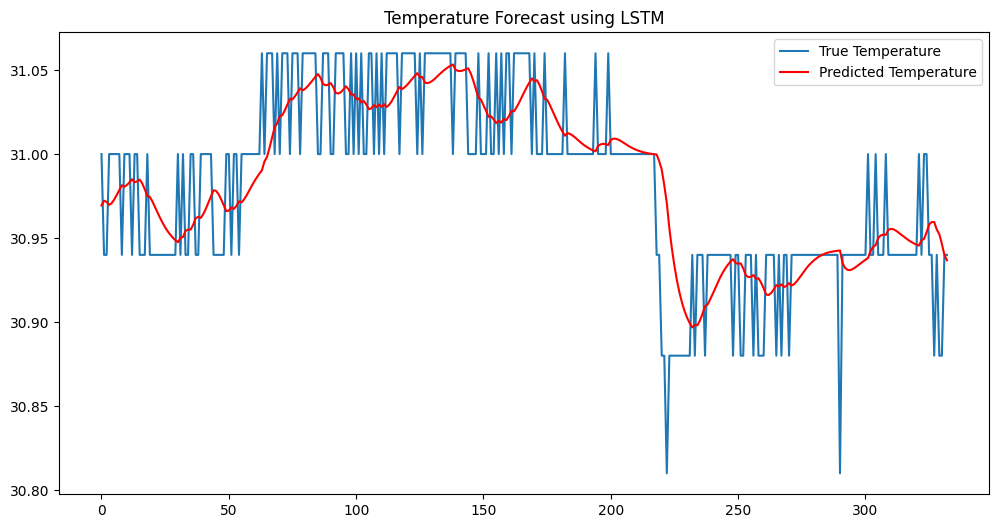

Root Mean Squared Error (RMSE): 0.03201929445869488


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
from tensorflow.keras.optimizers import Adam

# Assuming df is your dataframe with a 'temperature' column

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
df['temperature'] = scaler.fit_transform(df[['temperature']])

# Prepare the data for LSTM (using a time window of 24 hours)
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 24  # You can adjust this depending on how much past data you want to use to predict future
data = df['temperature'].values
data = data.reshape(-1, 1)

X, y = create_dataset(data, time_step)

# Reshape X to be 3D [samples, time_steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=False, input_shape=(time_step, 1)))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Predict using the model
y_pred = model.predict(X_test)

# Inverse transform the predictions to get the actual temperature values
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='True Temperature')
plt.plot(y_pred, label='Predicted Temperature', color='red')
plt.title('Temperature Forecast using LSTM')
plt.legend()
plt.show()

# Calculate performance metrics (e.g., RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")
